In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import diff, lambdify
import matplotlib.pyplot as plt
from sympy.abc import x 
from sympy import symbols, lambdify, diff 
from math import sqrt  

C:\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
a = 0.1
e = 0.001
x0 = [1, 1]
betta = 2

x1, x2 = symbols('x1 x2')
f = lambdify([x1, x2], '2 *x1 ** 2 + 5 * x2 ** 2 + x1 * x2 - 3 * x1 - x2 + 5') 

In [3]:
diff_f_x1 = diff(f(x1, x2), x1, degree=1)
diff_f_x2 = diff(f(x1, x2), x2, degree=1)

diff_f_x1_func = lambdify([x1, x2], diff_f_x1) #значение производной в точке
diff_f_x2_func = lambdify([x1, x2], diff_f_x2)

Функция двух переменных

In [9]:
a = 0.1 # Скорость обучения
e = 0.0001 # Точность
x1 = 1 # Начальное значение x1
x2 = 1 # Начальное значение x2
n = 0 # Счетчик итераций
x1_values = []
x2_values = []
f_values = []
# Алгоритм градиентного спуска
while abs(f(x1, x2) - f(x1 - a*diff_f_x1_func(x1, x2), x2 - a*diff_f_x2_func(x1, x2))) > e:
    x1new = x1 - a * diff_f_x1_func(x1, x2)
    x2new = x2 - a * diff_f_x2_func(x1, x2)
    n += 1
    x1 = x1new
    x2 = x2new # Всегда обновляем значения
    x1_values.append(x1)
    x2_values.append(x2)
    f_values.append(f(x1, x2))
    print(f'Номер итерации: {n}, точки: ({x1:.4f}, {x2:.4f}), значение функции: {f(x1, x2):.4f}', end='\n')
    print(' ')



Номер итерации: 1, точки: (0.8000, 0.0000), значение функции: 3.8800
 
Номер итерации: 2, точки: (0.7800, 0.0200), значение функции: 3.8744
 
Номер итерации: 3, точки: (0.7660, 0.0220), значение функции: 3.8728
 
Номер итерации: 4, точки: (0.7574, 0.0234), значение функции: 3.8722
 
Номер итерации: 5, точки: (0.7521, 0.0243), значение функции: 3.8719
 


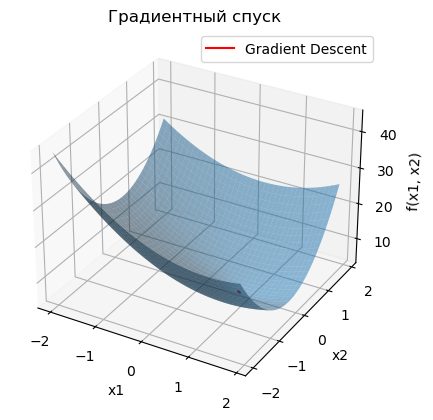

In [11]:
# Строим график
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Создаем сетку для построения поверхности
x_range = np.arange(-2, 2, 0.1)
y_range = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

# Поверхность функции
ax.plot_surface(X, Y, Z, alpha=0.5)

# Траектория градиентного спуска
ax.plot(x1_values, x2_values, f_values, label='Gradient Descent', color='red')

# Оси и заголовок
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Градиентный спуск')
ax.legend()

plt.show()
